In [1]:
import pandas as pd
import numpy as np
from plotnine import *
%matplotlib inline

In [6]:
deseq_norm = pd.read_csv("deseq_norm_counts.csv") #### normalized counts generated by deseq2
deseq_res = pd.read_csv('deseq_results.csv') ###### deseq2 differential expression data #########

In [7]:
deseq_norm.drop(['Unnamed: 0','GENEID'], axis = "columns", inplace = True)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import savefig
sns.set(style = "ticks", font = "Arial", font_scale = 1.5)

In [9]:
genes_enrich = deseq_norm[deseq_norm['GENENAME'].isin(['Klf1','Epor','Adra2b','Vcam1','Tfrc'])]

In [10]:
genes_enrich.columns = ['Gene','EKLF/GFP+','EKLF/GFP+','EKLF/GFP+','EKLF/GFP-','EKLF/GFP-','EKLF/GFP-']
genes_enrich.head()

,Gene,EKLF/GFP+,EKLF/GFP+,EKLF/GFP+,EKLF/GFP-,EKLF/GFP-,EKLF/GFP-
795,Epor,2631.144843,2829.101061,2741.379348,771.734208,1064.042103,762.424891
3117,Tfrc,37178.753231,49996.828625,43092.818850,19844.167854,20615.488204,19820.112891
5087,Vcam1,708.495028,1257.378249,1991.618432,644.342676,573.015053,896.068335
11471,Klf1,2640.667626,2375.047804,2316.866829,888.048215,1170.356216,739.420692
11977,Adra2b,1347.675639,1505.373642,1549.508069,446.166510,480.966294,414.474662


In [11]:
genes_m = genes_enrich.melt(id_vars = 'Gene')
genes_m.head()

,Gene,variable,value
0,Epor,EKLF/GFP+,2631.144843
1,Tfrc,EKLF/GFP+,37178.753231
2,Vcam1,EKLF/GFP+,708.495028
3,Klf1,EKLF/GFP+,2640.667626
4,Adra2b,EKLF/GFP+,1347.675639


In [12]:
genes_m.columns = ['Name','Sample','FPKM']
genes_m.head()

,Name,Sample,FPKM
0,Epor,EKLF/GFP+,2631.144843
1,Tfrc,EKLF/GFP+,37178.753231
2,Vcam1,EKLF/GFP+,708.495028
3,Klf1,EKLF/GFP+,2640.667626
4,Adra2b,EKLF/GFP+,1347.675639


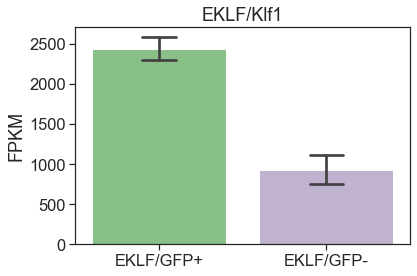

In [13]:
p_klf1_fpkm = sns.barplot(x = "Sample", y = "FPKM", data = genes_m[genes_m.Name == 'Klf1'], ci = "sd", capsize = 0.2, palette='Accent')
p_klf1_fpkm.set(ylabel = "FPKM", xlabel = "", title = "EKLF/Klf1")
klf1_fpkm_fig = p_klf1_fpkm.get_figure()
klf1_fpkm_fig.savefig('klf1_fpkm.pdf', dpi = 300, bbox_inches = 'tight')

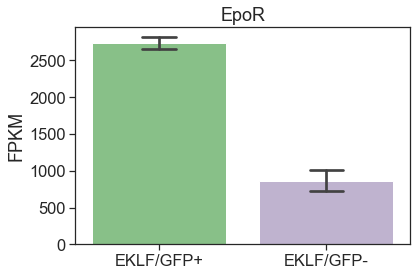

In [14]:
p_epor_fpkm = sns.barplot(x = "Sample", y = "FPKM", data = genes_m[genes_m.Name == 'Epor'], ci = "sd", capsize = 0.2, palette='Accent')
p_epor_fpkm.set(ylabel = "FPKM", xlabel = "", title = "EpoR")
epor_fpkm_fig = p_epor_fpkm.get_figure()
epor_fpkm_fig.savefig('epor_fpkm.pdf', dpi = 300, bbox_inches = 'tight')

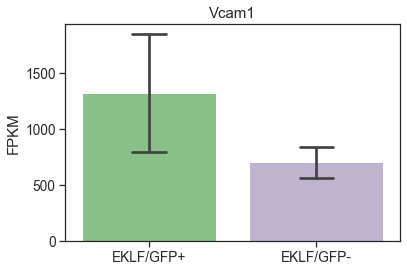

In [28]:
p_vcam_fpkm = sns.barplot(x = "Sample", y = "FPKM", data = genes_m[genes_m.Name == 'Vcam1'], ci = "sd", capsize = 0.2, palette='Accent')
p_vcam_fpkm.set(ylabel = "FPKM", xlabel = "", title = "Vcam1")
vcam_fpkm_fig = p_vcam_fpkm.get_figure()
vcam_fpkm_fig.savefig('vcam1_fpkm.pdf', dpi = 300, bbox_inches = 'tight')

In [23]:
deseq_res.drop(['Unnamed: 0','GENEID','baseMean','stat'], axis = 1, inplace= True)
deseq_res.head()

,GENENAME,log2FoldChange,lfcSE,pvalue,padj
0,Elane,-4.464518,0.159092,2.815384e-173,4.312324e-169
1,Gm1966,-4.249592,0.162146,2.132650e-151,1.633290e-147
2,F13a1,-4.156207,0.159199,3.041871e-150,1.553078e-146
3,Ctsg,-4.477199,0.173343,4.245835e-147,1.625836e-143
4,Lsp1,-4.176046,0.164338,1.891955e-142,5.795816e-139


In [24]:
deseq_up_sig = deseq_res[(deseq_res['log2FoldChange'] > 0) & (deseq_res['padj'] < 0.05)]
deseq_up_sig.head(10)

,GENENAME,log2FoldChange,lfcSE,pvalue,padj
79,Myh10,1.426303,0.100545,1.123283e-45,2.150666e-43
107,Adra2b,1.712878,0.127257,2.689533e-41,3.814405e-39
118,Tspan8,1.593912,0.121430,2.330972e-39,3.000294e-37
127,Slc6a9,1.691041,0.130395,1.842520e-38,2.204834e-36
129,Smox,1.424975,0.109957,2.079534e-38,2.450171e-36
138,Pklr,1.362996,0.106568,1.865403e-37,2.055567e-35
139,Samd14,1.475520,0.115396,1.948619e-37,2.131928e-35
140,Slc29a1,1.099979,0.086145,2.446602e-37,2.657773e-35
141,Abcb4,1.476144,0.116057,4.632579e-37,4.996987e-35
142,Gclc,1.005550,0.079423,9.770607e-37,1.046548e-34


In [25]:
deseq_up_sig.loc[deseq_up_sig['GENENAME'].isin(['Klf1','Epor','Vcam1'])]

,GENENAME,log2FoldChange,lfcSE,pvalue,padj
320,Epor,1.657592,0.160085,3.995669e-25,1.906594e-23
850,Klf1,1.389233,0.184142,4.545443e-14,8.181263e-13
4641,Vcam1,0.905212,0.341829,8.093565e-03,2.670597e-02


In [26]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [29]:
deseq_res['-log10padj'] = deseq_res['padj'].apply(np.log10)
deseq_res.head()

,GENENAME,log2FoldChange,lfcSE,pvalue,padj,-log10padj
0,Elane,-4.464518,0.159092,2.815384e-173,4.312324e-169,-168.365289
1,Gm1966,-4.249592,0.162146,2.132650e-151,1.633290e-147,-146.786937
2,F13a1,-4.156207,0.159199,3.041871e-150,1.553078e-146,-145.808807
3,Ctsg,-4.477199,0.173343,4.245835e-147,1.625836e-143,-142.788923
4,Lsp1,-4.176046,0.164338,1.891955e-142,5.795816e-139,-138.236885


In [30]:
deseq_res['-log10padj']*=-1
deseq_res.head()

,GENENAME,log2FoldChange,lfcSE,pvalue,padj,-log10padj
0,Elane,-4.464518,0.159092,2.815384e-173,4.312324e-169,168.365289
1,Gm1966,-4.249592,0.162146,2.132650e-151,1.633290e-147,146.786937
2,F13a1,-4.156207,0.159199,3.041871e-150,1.553078e-146,145.808807
3,Ctsg,-4.477199,0.173343,4.245835e-147,1.625836e-143,142.788923
4,Lsp1,-4.176046,0.164338,1.891955e-142,5.795816e-139,138.236885


In [31]:
deseq_up_sig = deseq_res[(deseq_res['padj'] < 0.05) & (deseq_res['log2FoldChange'] > 0)]
deseq_up_sig.head()

,GENENAME,log2FoldChange,lfcSE,pvalue,padj,-log10padj
79,Myh10,1.426303,0.100545,1.123283e-45,2.150666e-43,42.667427
107,Adra2b,1.712878,0.127257,2.689533e-41,3.814405e-39,38.418573
118,Tspan8,1.593912,0.121430,2.330972e-39,3.000294e-37,36.522836
127,Slc6a9,1.691041,0.130395,1.842520e-38,2.204834e-36,35.656624
129,Smox,1.424975,0.109957,2.079534e-38,2.450171e-36,35.610804


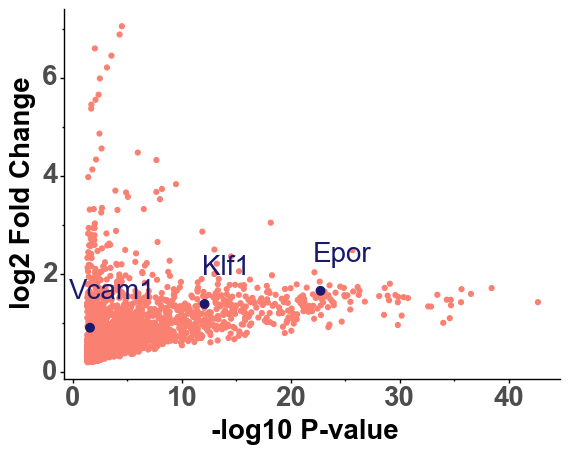

<ggplot: (306207705)>

In [32]:
##### enrichment plot for EKLF/GFP+ F4/80+ ###########
enrich = ggplot(deseq_up_sig, aes(x = '-log10padj', y = 'log2FoldChange')) + geom_point(color = 'salmon') + geom_point(deseq_up_sig.loc[deseq_up_sig['GENENAME'].isin(['Klf1','Epor','Vcam1'])],aes(x = '-log10padj', y = 'log2FoldChange'), color = 'midnightblue', size = 3) + geom_text(deseq_up_sig.loc[deseq_up_sig['GENENAME'].isin(['Klf1','Epor','Vcam1'])],aes(label='GENENAME'), va = 'top', nudge_y = 1, nudge_x = 2, color = 'midnightblue', size=20) + theme_classic() + theme(text = element_text(family = "Arial", size = 20, face = "bold")) + xlab('-log10 P-value') + ylab('log2 Fold Change')
enrich

In [33]:
deseq_sig = deseq_res[(deseq_res['padj'] < 0.05)]
deseq_sig.head()

,GENENAME,log2FoldChange,lfcSE,pvalue,padj,-log10padj
0,Elane,-4.464518,0.159092,2.815384e-173,4.312324e-169,168.365289
1,Gm1966,-4.249592,0.162146,2.132650e-151,1.633290e-147,146.786937
2,F13a1,-4.156207,0.159199,3.041871e-150,1.553078e-146,145.808807
3,Ctsg,-4.477199,0.173343,4.245835e-147,1.625836e-143,142.788923
4,Lsp1,-4.176046,0.164338,1.891955e-142,5.795816e-139,138.236885


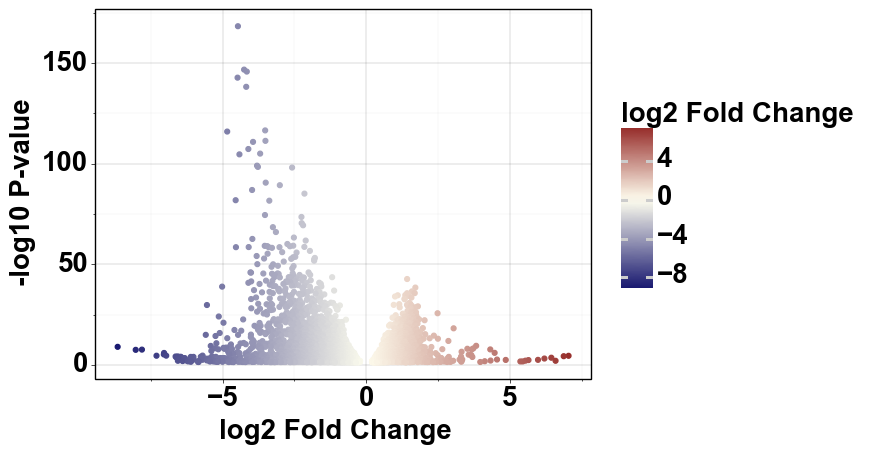

<ggplot: (306303945)>

In [35]:
######### Volcano Plot ###########
vol = ggplot(deseq_sig, aes(x = 'log2FoldChange', y = '-log10padj')) + geom_point(aes(color = 'log2FoldChange')) + scale_color_gradient2('midnightblue','ivory','maroon',0) + theme_linedraw() + theme(text = element_text(family = 'Arial', size = 20, face = 'bold')) + labs(color = 'log2 Fold Change') + ylab('-log10 P-value') + xlab('log2 Fold Change')
vol

In [13]:
sns.set(font_scale = 1)

In [46]:
from sklearn.preprocessing import normalize
from scipy.stats import zscore
from scipy import stats

In [38]:
eklf_gfp = deseq_norm.copy()
eklf_gfp.head()

,GENENAME,1_EKLF_GFP,2_EKLF_GFP,9_EKLF_GFP,3_minus,4_minus,10_minus
0,Gnai3,3259.648497,2802.905681,3086.691770,3752.511428,3739.914283,3362.994850
1,Cdc45,2225.617830,3171.147885,3457.019893,2402.717032,2444.022901,2954.477466
2,Scml2,357.964102,421.882861,429.743624,322.061619,255.702706,358.581039
3,Apoh,134.271235,185.550610,80.256098,113.544626,174.787610,140.216072
4,Narf,4015.492542,4746.007403,4334.619169,1966.734567,2049.763386,2145.407340


In [40]:
eklf_gfp.set_index('GENENAME',inplace=True)
eklf_gfp.head()

,1_EKLF_GFP,2_EKLF_GFP,9_EKLF_GFP,3_minus,4_minus,10_minus
GENENAME,,,,,,
Gnai3,3259.648497,2802.905681,3086.691770,3752.511428,3739.914283,3362.994850
Cdc45,2225.617830,3171.147885,3457.019893,2402.717032,2444.022901,2954.477466
Scml2,357.964102,421.882861,429.743624,322.061619,255.702706,358.581039
Apoh,134.271235,185.550610,80.256098,113.544626,174.787610,140.216072
Narf,4015.492542,4746.007403,4334.619169,1966.734567,2049.763386,2145.407340


In [41]:
eklf_gfp.columns = ['EKLF/GFP+(1)','EKLF/GFP+(2)','EKLF/GFP+(9)','EKLF/GFP-(3)','EKLF/GFP-(4)','EKLF/GFP-(10)']
eklf_gfp.head()

,EKLF/GFP+(1),EKLF/GFP+(2),EKLF/GFP+(9),EKLF/GFP-(3),EKLF/GFP-(4),EKLF/GFP-(10)
GENENAME,,,,,,
Gnai3,3259.648497,2802.905681,3086.691770,3752.511428,3739.914283,3362.994850
Cdc45,2225.617830,3171.147885,3457.019893,2402.717032,2444.022901,2954.477466
Scml2,357.964102,421.882861,429.743624,322.061619,255.702706,358.581039
Apoh,134.271235,185.550610,80.256098,113.544626,174.787610,140.216072
Narf,4015.492542,4746.007403,4334.619169,1966.734567,2049.763386,2145.407340


In [42]:
eklf_gfp.sort_values('EKLF/GFP+(1)',ascending=False, inplace=True)
eklf_gfp.head()

,EKLF/GFP+(1),EKLF/GFP+(2),EKLF/GFP+(9),EKLF/GFP-(3),EKLF/GFP-(4),EKLF/GFP-(10)
GENENAME,,,,,,
Gapdh,173656.728531,211142.016228,184985.400246,221072.008917,235729.111230,278448.555483
Hspa8,169589.707484,190074.014387,182367.066050,161570.175172,189257.366882,175410.778772
Mki67,167811.427945,190403.303897,181735.709944,115059.477702,125309.202185,102029.101088
Gm10359,156990.690032,83562.171349,119863.538383,173395.568024,209671.253238,65125.983658
Eef1a1,139602.161009,163553.311705,160208.414743,127817.261134,152448.875115,143231.450077


In [43]:
eklf_gfp.shape

(15957, 6)

In [44]:
eklf_gfp_scaled = eklf_gfp.head(5000) #### taking top 5000 expressed genes
eklf_gfp_scaled.shape

(5000, 6)

In [47]:
eklf_gfp_scaled = eklf_gfp_scaled[(np.abs(stats.zscore(eklf_gfp_scaled)) < 3).all(axis=1)] ### row-wise Z-score scaling
eklf_gfp_scaled.shape

(4903, 6)

In [48]:
eklf_gfp_scaled = eklf_gfp_scaled.apply(zscore)
eklf_gfp_scaled.head()

,EKLF/GFP+(1),EKLF/GFP+(2),EKLF/GFP+(9),EKLF/GFP-(3),EKLF/GFP-(4),EKLF/GFP-(10)
GENENAME,,,,,,
Eif3a,6.764069,5.873646,6.743512,6.034671,6.070354,6.223823
Rpl29,6.723802,6.010864,6.157762,7.022784,7.040010,6.745202
Gm6472,6.445082,4.833558,4.460362,6.868418,7.103976,5.048070
Hspa9,6.387684,4.571089,5.166082,5.720689,6.145652,5.035847
Prpf8,6.384705,5.003704,5.799546,5.929463,6.156145,5.333045


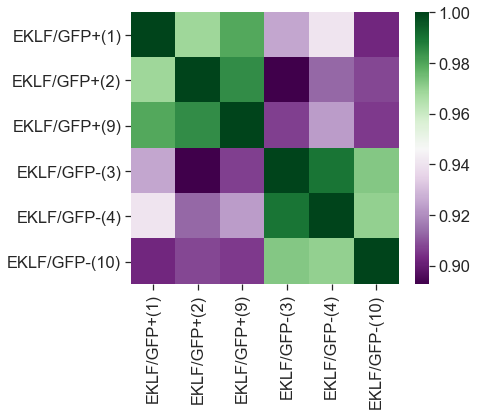

In [49]:
####### Correlation plot ######
plt.figure(figsize=(6,5))
corrplot_eklf_gfp = sns.heatmap(eklf_gfp_scaled.corr(), cmap = 'PRGn')

In [50]:
######## Principal Component Analysis ############
eklf_gfp_sc_T = eklf_gfp_scaled.transpose()
eklf_gfp_sc_T.iloc[:,0:10]

GENENAME,Eif3a,Rpl29,Gm6472,Hspa9,Prpf8,Prrc2c,Pcna,Gm10288,Serinc3,Hist1h2ap
EKLF/GFP+(1),6.764069,6.723802,6.445082,6.387684,6.384705,6.362881,6.235893,5.966358,5.824662,5.708677
EKLF/GFP+(2),5.873646,6.010864,4.833558,4.571089,5.003704,4.586624,4.929304,5.075200,6.293760,5.127141
EKLF/GFP+(9),6.743512,6.157762,4.460362,5.166082,5.799546,4.760874,5.044544,5.066906,5.850146,5.352691
EKLF/GFP-(3),6.034671,7.022784,6.868418,5.720689,5.929463,6.872052,4.995079,6.301542,4.577593,6.759961
EKLF/GFP-(4),6.070354,7.040010,7.103976,6.145652,6.156145,6.611109,5.427974,6.541508,5.409215,6.007485
EKLF/GFP-(10),6.223823,6.745202,5.048070,5.035847,5.333045,4.990602,3.925546,4.638464,4.519381,6.030646


In [51]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components=2)

In [54]:
prcomp = pca.fit_transform(eklf_gfp_sc_T)

In [55]:
prDf = pd.DataFrame(data = prcomp
             , columns = ['principal component 1', 'principal component 2'])
prDf

,principal component 1,principal component 2
0,10.782994,-8.445356
1,14.955477,6.677923
2,14.128115,0.821313
3,-14.784079,-4.556102
4,-11.273511,-4.648624
5,-13.808995,10.150847


In [60]:
prDf['Sample'] = ['EKLF/GFP+(1)','EKLF/GFP+(2)','EKLF/GFP+(9)','EKLF/GFP-(3)','EKLF/GFP-(4)','EKLF/GFP-(10)']
prDf

,principal component 1,principal component 2,Sample
0,10.782994,-8.445356,EKLF/GFP+(1)
1,14.955477,6.677923,EKLF/GFP+(2)
2,14.128115,0.821313,EKLF/GFP+(9)
3,-14.784079,-4.556102,EKLF/GFP-(3)
4,-11.273511,-4.648624,EKLF/GFP-(4)
5,-13.808995,10.150847,EKLF/GFP-(10)


In [61]:
prDf['Type'] = ['EKLF/GFP+','EKLF/GFP+','EKLF/GFP+','EKLF/GFP-','EKLF/GFP-','EKLF/GFP-']
prDf

,principal component 1,principal component 2,Sample,Type
0,10.782994,-8.445356,EKLF/GFP+(1),EKLF/GFP+
1,14.955477,6.677923,EKLF/GFP+(2),EKLF/GFP+
2,14.128115,0.821313,EKLF/GFP+(9),EKLF/GFP+
3,-14.784079,-4.556102,EKLF/GFP-(3),EKLF/GFP-
4,-11.273511,-4.648624,EKLF/GFP-(4),EKLF/GFP-
5,-13.808995,10.150847,EKLF/GFP-(10),EKLF/GFP-


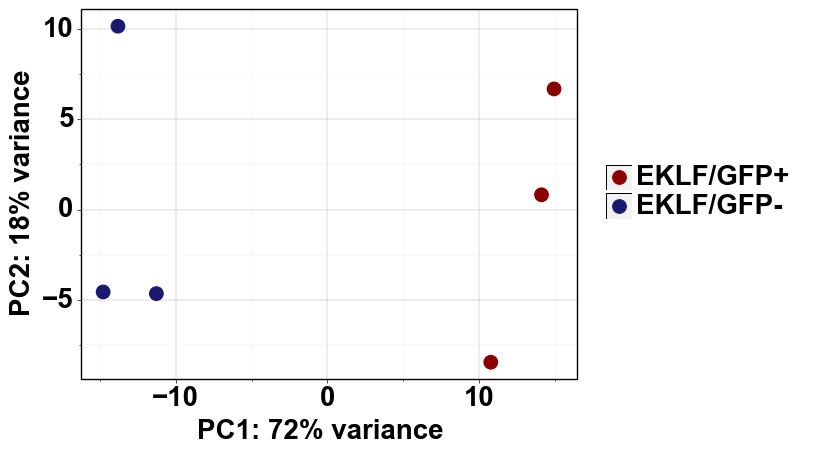

<ggplot: (306338165)>

In [62]:
pcaplot1 = ggplot(prDf, aes(x='principal component 1', y='principal component 2', color='Type')) + geom_point(size=5) + scale_color_manual(values=['darkred','midnightblue']) + theme_linedraw() + theme(text=element_text(face='bold',family='Arial',size=20)) + theme(legend_title=element_blank()) + xlab('PC1: 72% variance') + ylab('PC2: 18% variance')
pcaplot1

In [ ]:
########## single cell seq related plots ###############

In [15]:
###### Barplots for EKLF markers ###############
klf1_markers = deseq_norm[deseq_norm['GENENAME'].isin(["Car2","Hemgn","Gypa","Cited4","Rhd","Snca","Zfpm1", 
"Icam4","Sptb","Spta1","Klf1","Add2","Nxpe2","Samd14","Gata1","Slc38a5","Epor","Vcam1"])]

In [16]:
klf1_markers.columns = ['Gene','EKLF/GFP+','EKLF/GFP+','EKLF/GFP+','EKLF/GFP-','EKLF/GFP-','EKLF/GFP-']
klf1_markers.head()

,Gene,EKLF/GFP+,EKLF/GFP+,EKLF/GFP+,EKLF/GFP-,EKLF/GFP-,EKLF/GFP-
127,Icam4,582.794298,635.237970,627.264766,246.474920,297.319131,144.597824
795,Epor,2631.144843,2829.101061,2741.379348,771.734208,1064.042103,762.424891
2352,Sptb,29418.584885,33761.530585,35513.887924,11595.179112,12538.340448,10055.934268
4166,Snca,1847.537681,2047.084525,2012.675810,621.293077,777.582937,595.019515
4455,Spta1,25947.395115,34356.867286,34041.470687,10627.914415,10891.323990,10528.243906


In [18]:
klf1_m = klf1_markers.melt(id_vars='Gene')
klf1_m.head()

,Gene,variable,value
0,Icam4,EKLF/GFP+,582.794298
1,Epor,EKLF/GFP+,2631.144843
2,Sptb,EKLF/GFP+,29418.584885
3,Snca,EKLF/GFP+,1847.537681
4,Spta1,EKLF/GFP+,25947.395115


In [19]:
klf1_m.columns = ['Name','Sample','FPKM']
klf1_m.head()

,Name,Sample,FPKM
0,Icam4,EKLF/GFP+,582.794298
1,Epor,EKLF/GFP+,2631.144843
2,Sptb,EKLF/GFP+,29418.584885
3,Snca,EKLF/GFP+,1847.537681
4,Spta1,EKLF/GFP+,25947.395115


In [20]:
def barplots(eklf):
    for gene in eklf:
     ax = sns.barplot(x='Sample',y='FPKM', data=klf1_m[klf1_m.Name==gene], ci='sd', capsize=0.2, palette='Accent')
     ax.set_xlabel("")
     ax.set_ylabel("FPKM", fontname="Arial", fontsize=20, weight='bold')
     ax.set_title(gene, fontname="Arial", fontsize=25, weight='bold')  
     for tick in ax.get_xticklabels():
      tick.set_fontname("Arial")
     plt.savefig('{s}.png'.format(s=gene), dpi=300, bbox_inches='tight')
     plt.clf()

In [ ]:
eklf_markers = klf1_markers['Gene']
barplots(eklf_markers)

In [ ]:
###### Barplots for macrophage markers ###############
macrophage_markers = deseq_norm[deseq_norm['GENENAME'].isin(["Mac1","Adgre1","Csf1r","Vcam1",'Dnase2a','Spi1','Spic','Itgam','Emr1','Cd68','Itgax','Cd163','Ly6c2','Lgals3','Il4ra'])]
macrophage_markers.columns = ['Gene','EKLF/GFP+','EKLF/GFP+','EKLF/GFP+','EKLF/GFP-','EKLF/GFP-','EKLF/GFP-']
macrophage_markers.head()

In [ ]:
mac_markers_m = macrophage_markers.melt(id_vars='Gene')
mac_markers_m.columns = ['Name','Sample','FPKM']
mac_markers_m.head()

In [ ]:
def barplots(markers):
    for gene in markers:
     ax = sns.barplot(x='Sample',y='FPKM', data=mac_markers_m[mac_markers_m.Name==gene], ci='sd', capsize=0.2, palette='Accent')
     ax.set(xlabel="", title=gene)
     plt.savefig('{s}.png'.format(s=gene), dpi=300, bbox_inches='tight')
     plt.clf()

In [ ]:
mac_genes = macrophage_markers['Gene']
barplots(mac_genes)